In [11]:
import pickle
import json
import networkx as nx
import matplotlib.pyplot as plt

In [12]:
with open('data/homomorphism_counts/ENZYMES_50.homson', 'r') as f:
    homomorphism_data = json.load(f)

In [13]:
pattern_sizes = homomorphism_data['pattern_sizes']
graph_sizes = [homomorphism_data['data'][i]['vertices'] for i in range(len(homomorphism_data['data']))]
homomorphism_counts = [homomorphism_data['data'][i]['counts'] for i in range(len(homomorphism_data['data']))]

In [14]:
homomorphism_densities = []
wrong_graphs = []
wrong_patterns = []
errors = 0

for i, VG in enumerate(graph_sizes):
    graph_densities = []
    for j, VF in enumerate(pattern_sizes):
        num = homomorphism_counts[i][j]
        den = VG**VF
        if num > den:
            errors += 1
            wrong_graphs.append(i)
            wrong_patterns.append(j)
        graph_densities.append(num/den)
    homomorphism_densities.append(graph_densities)

In [31]:
unique_wrong_patterns = list(set(wrong_patterns))
print(f"Patterns for which densities are larger than 1: {unique_wrong_patterns}\nSizes: {[pattern_sizes[i] for i in unique_wrong_patterns]}")

Patterns for which densities are larger than 1: [33, 38, 45, 46, 47, 49]
Sizes: [12, 9, 9, 6, 6, 5]


In [18]:
def read_patterns(file_path):
    with open(file_path, "rb") as f:
        graphs = []
        try:
            while True:
                graph = pickle.load(f)
                graphs.append(graph)
        except EOFError:
            pass
    return graphs

file_path = "ENZYMES_full_kernel_max_50_run1.patterns"
graphs = read_patterns(file_path)[0]

In [34]:
pattern_sizes

[1,
 2,
 3,
 3,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 9,
 9,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 13,
 13,
 13,
 14,
 15,
 15,
 16,
 17,
 17,
 18,
 18,
 18,
 19,
 21,
 23,
 24,
 24,
 28,
 33,
 33,
 42,
 44,
 46,
 93,
 105,
 110]

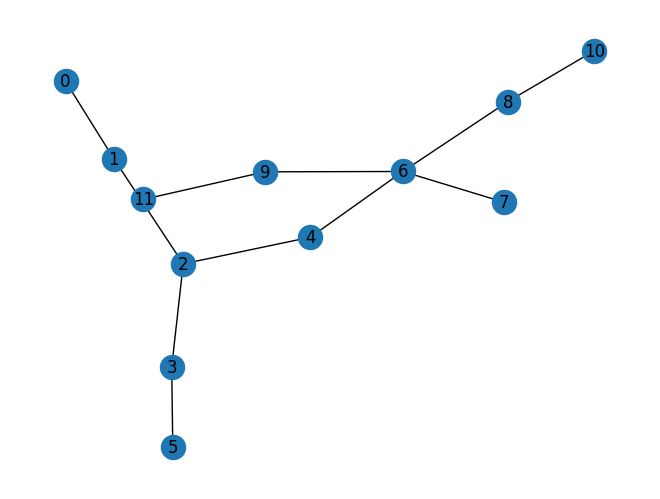

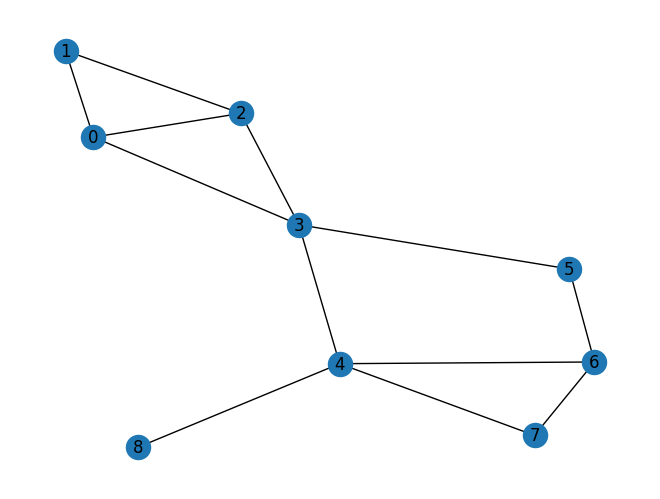

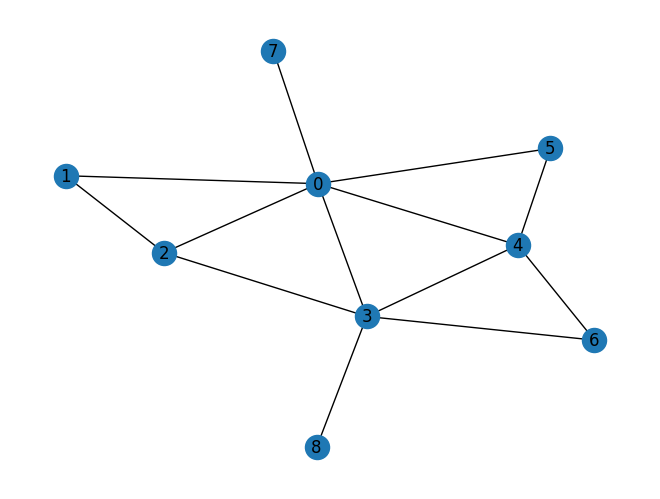

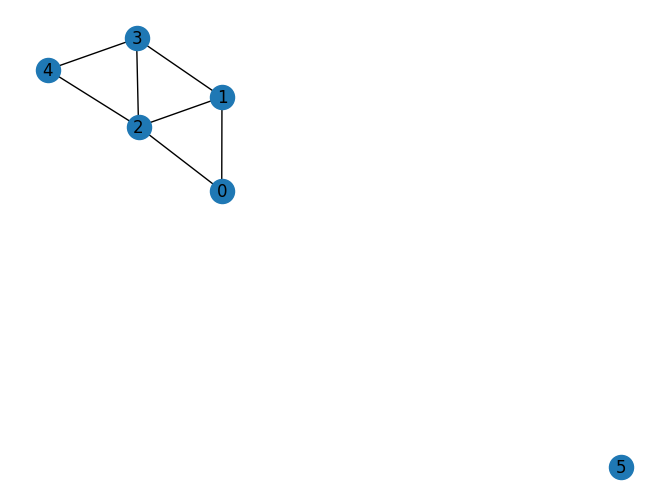

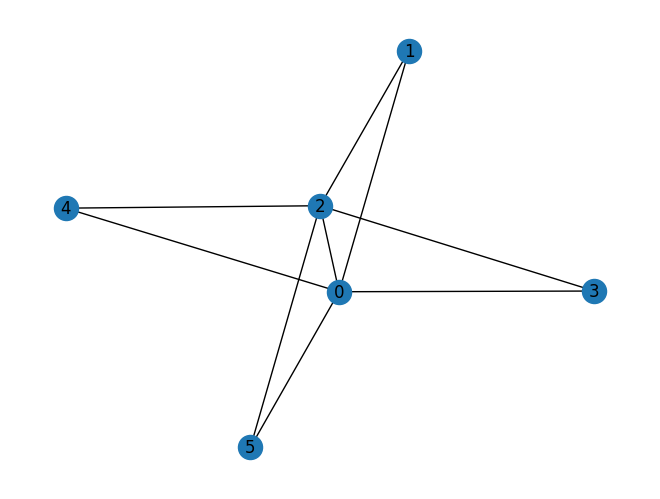

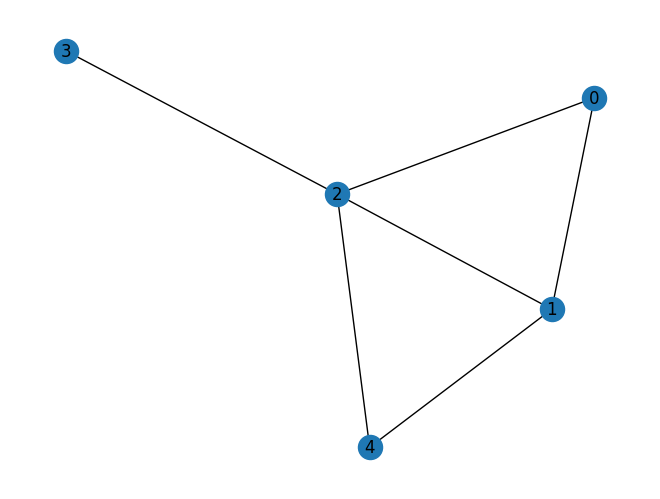

In [30]:
for i in unique_wrong_patterns:
    nx.draw_spring(graphs[i], with_labels=True)
    plt.show()